<a href="https://colab.research.google.com/github/suni608/wea_pea/blob/main/demand%20forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder,PowerTransformer,OrdinalEncoder
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/retail_store_inventory.csv')

In [4]:
df.sample(5)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
9871,2022-04-09,S004,P0012,Clothing,South,410,14,147,16.46,70.26,10,Cloudy,1,66.33,Winter
45935,2023-04-05,S002,P0016,Clothing,North,87,19,135,24.72,28.54,20,Snowy,0,32.26,Spring
15333,2022-06-03,S002,P0014,Groceries,South,397,283,24,288.71,50.71,10,Snowy,0,54.73,Autumn
62976,2023-09-22,S004,P0017,Furniture,East,175,82,122,80.55,28.97,0,Rainy,1,31.69,Summer
60987,2023-09-02,S005,P0008,Furniture,South,284,56,82,46.78,31.90,10,Cloudy,0,31.09,Spring


In [5]:
df.shape

(73100, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

<ipython-input-104-388cb9b6e1b4>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Units Sold', estimator='sum', ci=None)


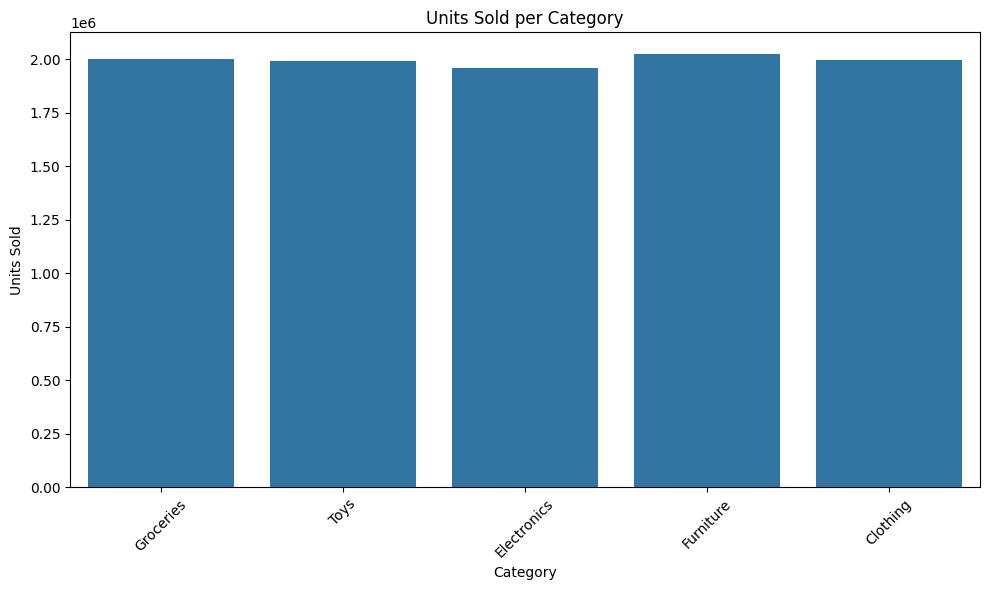

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use seaborn directly if data is not aggregated
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Units Sold', estimator='sum', ci=None)
plt.xticks(rotation=45)
plt.title('Units Sold per Category')
plt.tight_layout()
plt.show()


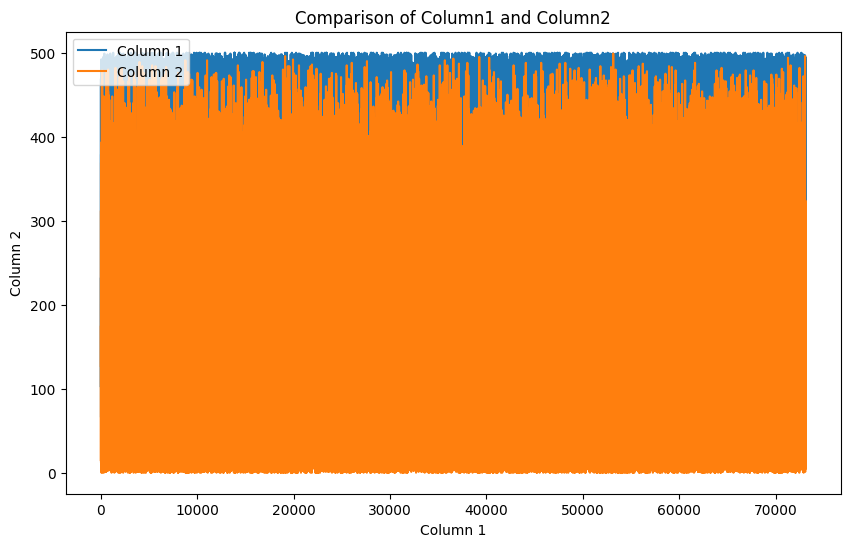

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Inventory Level'], label='Column 1')
plt.plot(df['Units Sold'], label='Column 2')
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title('Comparison of Column1 and Column2')
plt.legend()
plt.show()


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(df['Inventory Level'],df['Units Sold'],estimator=np.mean)
plt.title("Inventory Level vs Units Sold")
plt.show()


TypeError: barplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

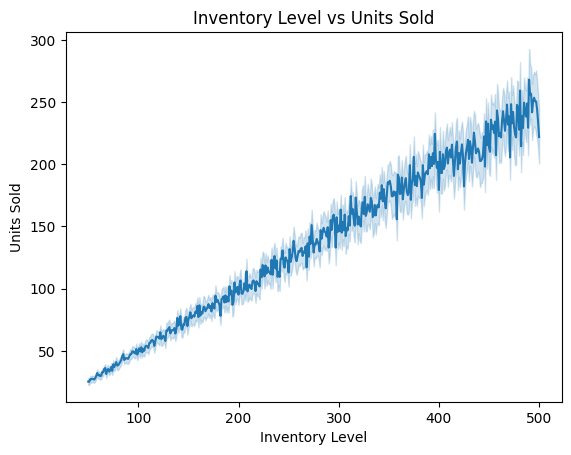

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x='Inventory Level', y='Units Sold', data=df)
plt.title("Inventory Level vs Units Sold")
plt.show()


<Axes: xlabel='Units Sold', ylabel='Inventory Level'>

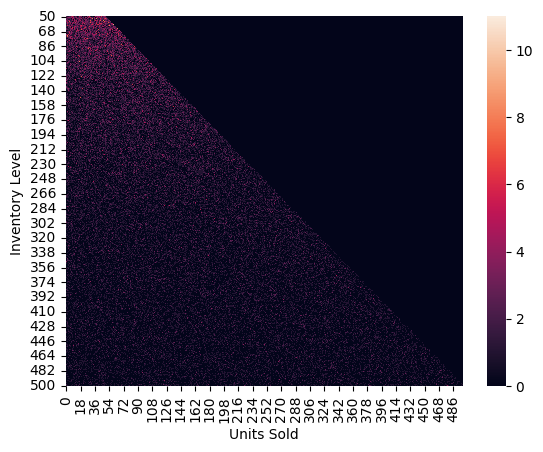

In [7]:
sns.heatmap(pd.crosstab(df['Inventory Level'],df['Units Sold']))

<ipython-input-11-3bc3013cab1f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inventory Level'])


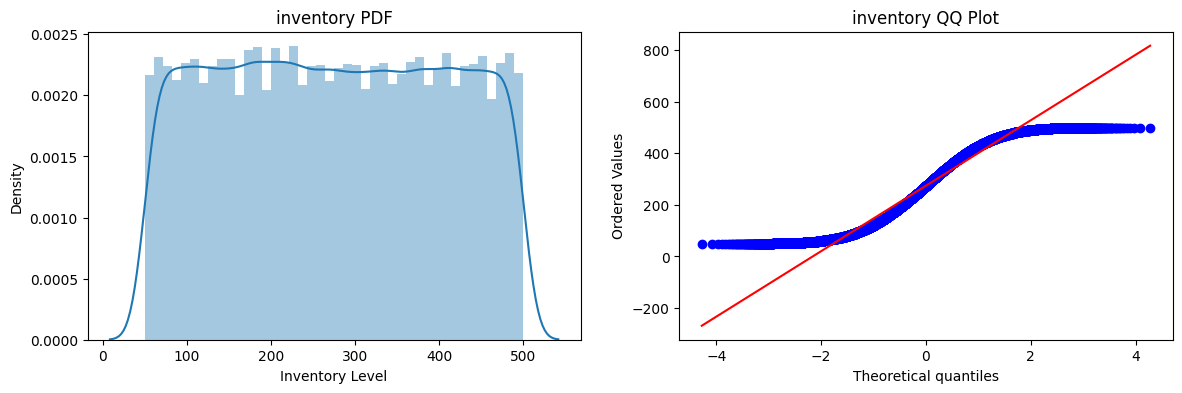

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Inventory Level'])
plt.title('inventory PDF')

plt.subplot(122)
stats.probplot(df['Inventory Level'], dist="norm", plot=plt)
plt.title('inventory QQ Plot')

plt.show()


<ipython-input-12-cd61f5a93b5f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Units Sold'])


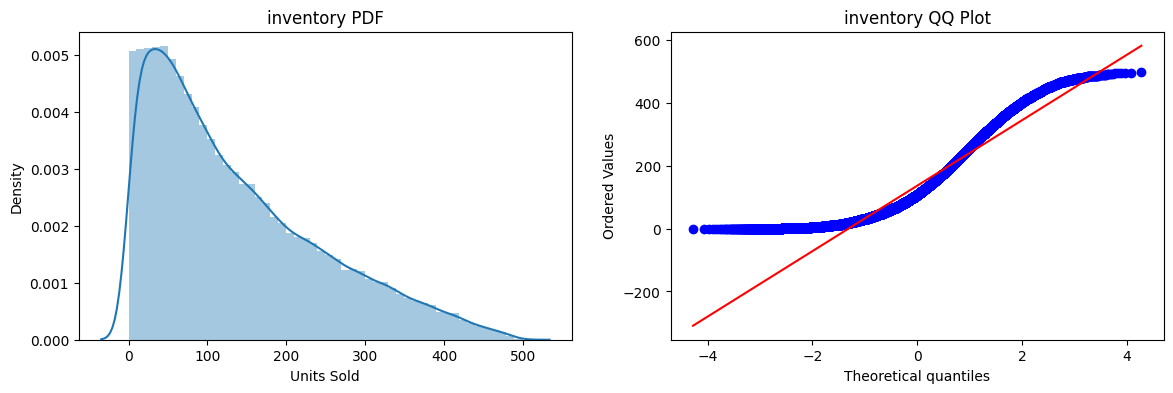

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Units Sold'])
plt.title('inventory PDF')

plt.subplot(122)
stats.probplot(df['Units Sold'], dist="norm", plot=plt)
plt.title('inventory QQ Plot')

plt.show()

<Axes: ylabel='Units Sold'>

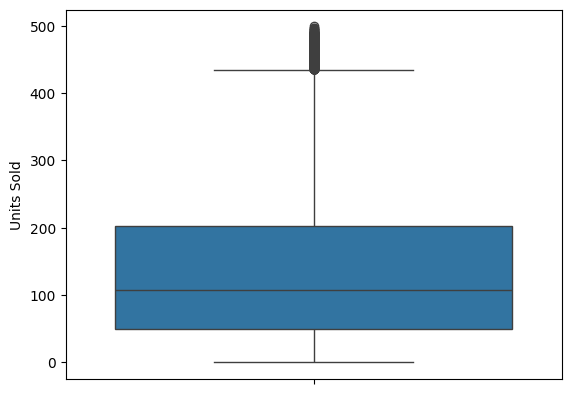

In [17]:
sns.boxplot(df['Units Sold'])

<ipython-input-13-1ea57e6e33ea>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Units Ordered'])


Text(0.5, 1.0, 'inventory QQ Plot')

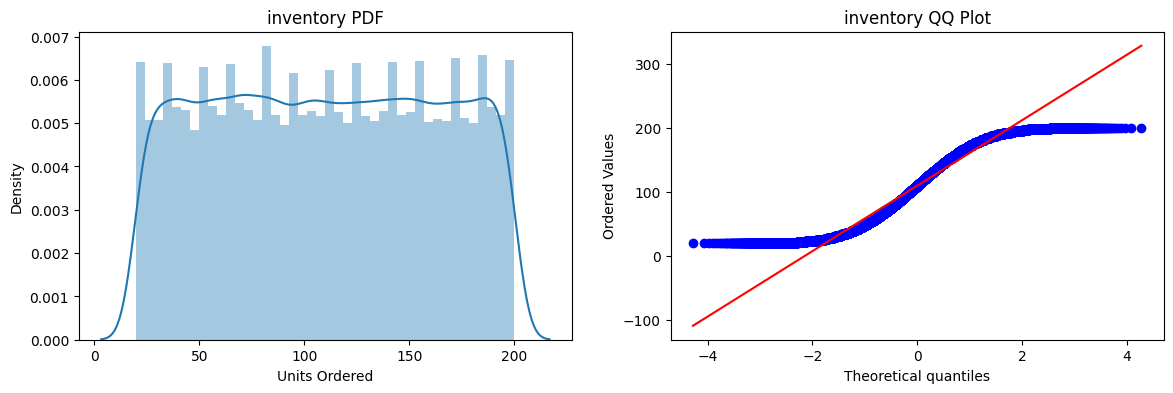

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Units Ordered'])
plt.title('inventory PDF')

plt.subplot(122)
stats.probplot(df['Units Ordered'], dist="norm", plot=plt)
plt.title('inventory QQ Plot')

<Axes: ylabel='Units Ordered'>

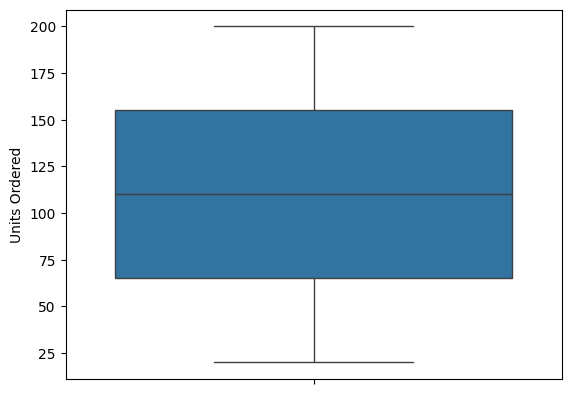

In [18]:
sns.boxplot(df['Units Ordered'])

<ipython-input-14-957889f48c8e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Demand Forecast'])


Text(0.5, 1.0, 'inventory QQ Plot')

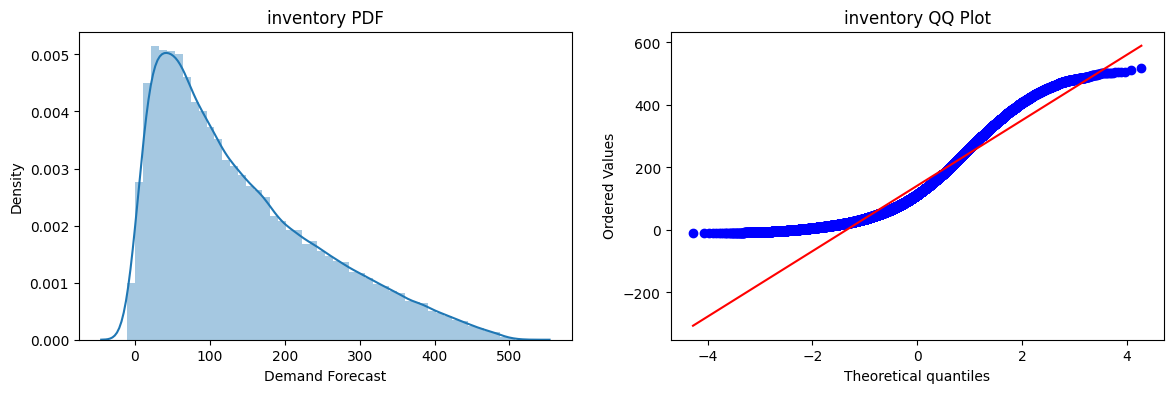

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Demand Forecast'])
plt.title('inventory PDF')

plt.subplot(122)
stats.probplot(df['Demand Forecast'], dist="norm", plot=plt)
plt.title('inventory QQ Plot')

<Axes: ylabel='Demand Forecast'>

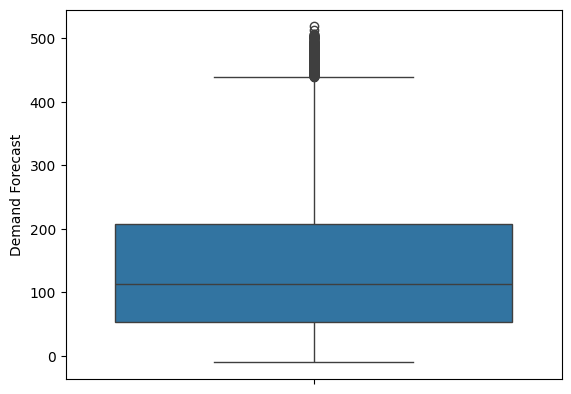

In [19]:
sns.boxplot(df['Demand Forecast'])

<ipython-input-15-77106b31f5a7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


Text(0.5, 1.0, 'inventory QQ Plot')

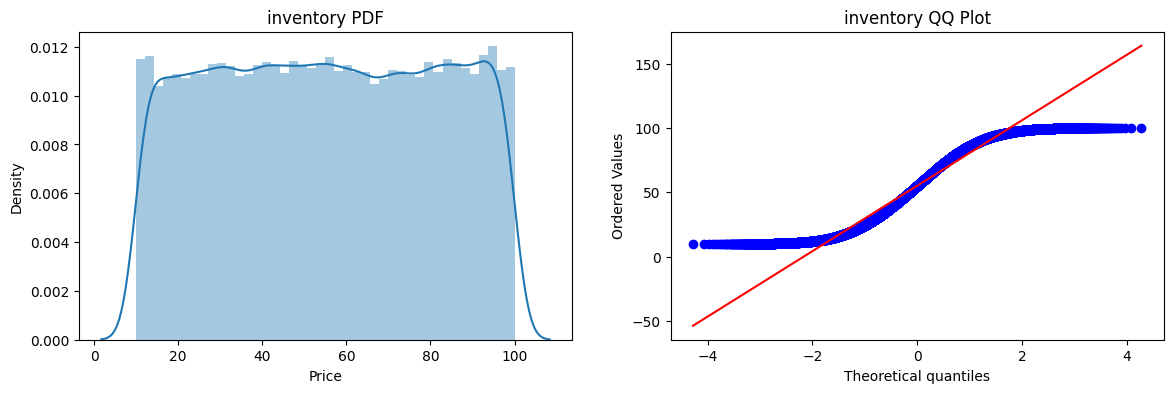

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Price'])
plt.title('inventory PDF')

plt.subplot(122)
stats.probplot(df['Price'], dist="norm", plot=plt)
plt.title('inventory QQ Plot')

<Axes: ylabel='Price'>

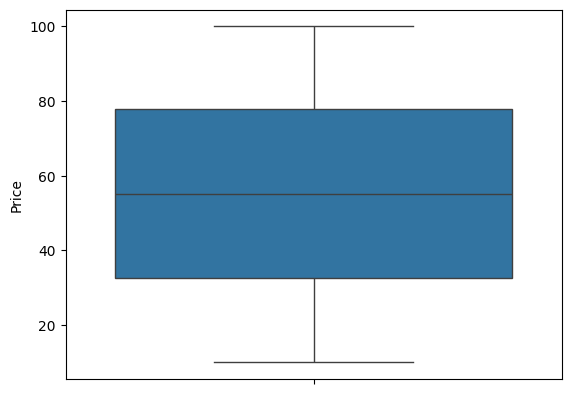

In [20]:
sns.boxplot(df['Price'])

<ipython-input-16-2a009d23c1ff>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Discount'])


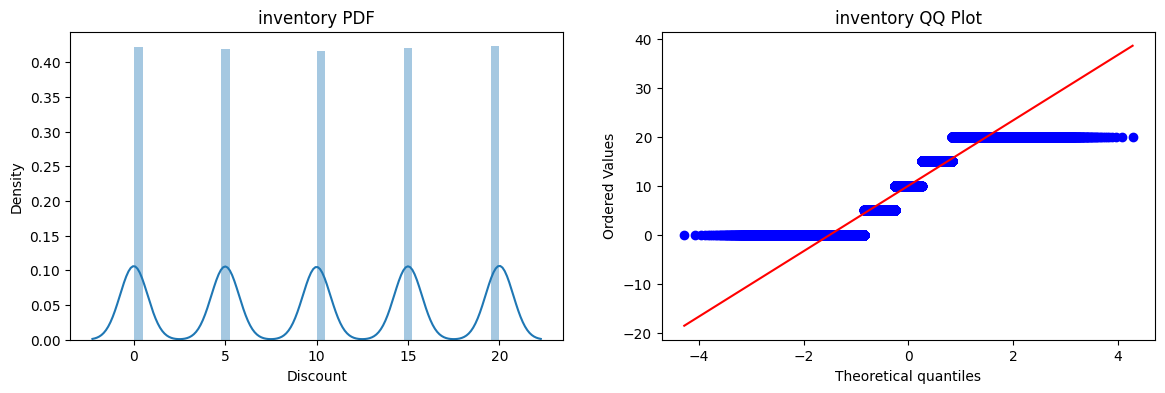

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Discount'])
plt.title('inventory PDF')

plt.subplot(122)
stats.probplot(df['Discount'], dist="norm", plot=plt)
plt.title('inventory QQ Plot')

plt.show()

<Axes: ylabel='Discount'>

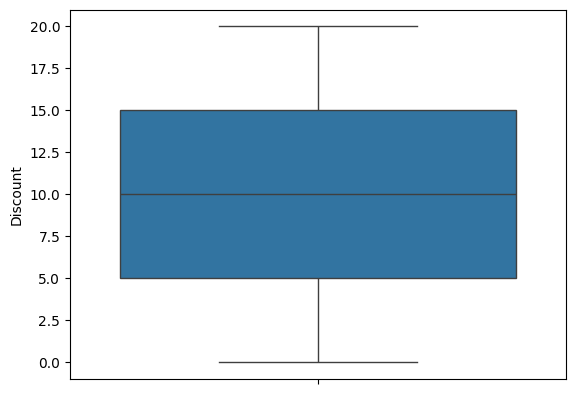

In [22]:
sns.boxplot(df['Discount'])

In [73]:
df['Date'] = pd.to_datetime(df['Date'])


In [74]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # 0 = Monday
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)


In [34]:
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Year,Month,Day,DayOfWeek,IsWeekend
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,2022,1,1,5,1
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,2022,1,1,5,1
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,2022,1,1,5,1
3,2022-01-01,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,2022,1,1,5,1
4,2022-01-01,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,2022,1,1,5,1


In [75]:
df=df.drop('Date',axis=1)

In [36]:
df.head()

,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Year,Month,Day,DayOfWeek,IsWeekend
0,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn,2022,1,1,5,1
1,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn,2022,1,1,5,1
2,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer,2022,1,1,5,1
3,S001,P0004,Toys,North,469,61,164,62.18,32.72,10,Cloudy,1,34.74,Autumn,2022,1,1,5,1
4,S001,P0005,Electronics,East,166,14,135,9.26,73.64,0,Sunny,0,68.95,Summer,2022,1,1,5,1


In [76]:
percentile25 = df['Units Sold'].quantile(0.25)
percentile75 = df['Units Sold'].quantile(0.75)
percentile255 = df['Demand Forecast'].quantile(0.25)
percentile755 = df['Demand Forecast'].quantile(0.75)

In [77]:
iqr = percentile75 - percentile25
iqr2 = percentile755 - percentile255

In [78]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
upper_limit2 = percentile755 + 1.5 * iqr2
lower_limit2 = percentile255 - 1.5 * iqr2

In [79]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)
print("Upper limit",upper_limit2)
print("Lower limit",lower_limit2)

Upper limit 434.0
Lower limit -182.0
Upper limit 439.62625
Lower limit -177.90375


In [80]:
df[df['Units Sold'] > upper_limit]


,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Year,Month,Day,DayOfWeek,IsWeekend
102,S001,P0003,Clothing,South,488,464,163,463.12,70.99,10,Snowy,0,72.93,Summer,2022,1,2,6,1
138,S002,P0019,Toys,East,492,479,132,469.74,79.11,0,Cloudy,0,80.06,Winter,2022,1,2,6,1
195,S005,P0016,Groceries,East,487,437,106,432.86,43.64,15,Cloudy,1,39.13,Autumn,2022,1,2,6,1
322,S002,P0003,Toys,North,493,448,113,459.44,41.55,15,Rainy,0,44.02,Winter,2022,1,4,1,0
554,S003,P0015,Furniture,North,490,476,53,478.76,20.66,0,Rainy,1,16.87,Winter,2022,1,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72428,S002,P0009,Clothing,South,485,453,172,444.97,82.93,15,Cloudy,1,79.35,Autumn,2023,12,26,1,0
72485,S005,P0006,Groceries,West,498,482,33,488.92,34.79,10,Sunny,1,31.68,Autumn,2023,12,26,1,0
72567,S004,P0008,Furniture,East,493,441,79,435.81,91.84,20,Rainy,1,88.97,Summer,2023,12,27,2,0
72884,S005,P0005,Furniture,East,498,472,169,485.17,95.79,20,Sunny,1,98.65,Summer,2023,12,30,5,1


In [46]:
df[df['Demand Forecast'] > upper_limit]


,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Year,Month,Day,DayOfWeek,IsWeekend
102,S001,P0003,Clothing,South,488,464,163,463.12,70.99,10,Snowy,0,72.93,Summer,2022,1,2,6,1
138,S002,P0019,Toys,East,492,479,132,469.74,79.11,0,Cloudy,0,80.06,Winter,2022,1,2,6,1
322,S002,P0003,Toys,North,493,448,113,459.44,41.55,15,Rainy,0,44.02,Winter,2022,1,4,1,0
554,S003,P0015,Furniture,North,490,476,53,478.76,20.66,0,Rainy,1,16.87,Winter,2022,1,6,3,0
606,S001,P0007,Clothing,North,461,429,25,440.06,50.47,10,Rainy,1,46.52,Summer,2022,1,7,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72428,S002,P0009,Clothing,South,485,453,172,444.97,82.93,15,Cloudy,1,79.35,Autumn,2023,12,26,1,0
72485,S005,P0006,Groceries,West,498,482,33,488.92,34.79,10,Sunny,1,31.68,Autumn,2023,12,26,1,0
72567,S004,P0008,Furniture,East,493,441,79,435.81,91.84,20,Rainy,1,88.97,Summer,2023,12,27,2,0
72884,S005,P0005,Furniture,East,498,472,169,485.17,95.79,20,Sunny,1,98.65,Summer,2023,12,30,5,1


In [81]:
new_df_cap = df.copy()

new_df_cap['Units Sold'] = np.where(
    new_df_cap['Units Sold'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Units Sold'] < lower_limit,
        lower_limit,
        new_df_cap['Units Sold']
    )
)

In [48]:
new_df_cap.shape

(73100, 19)

In [82]:
new_df_cap2 = new_df_cap.copy()

new_df_cap2['Demand Forecast'] = np.where(
    new_df_cap2['Demand Forecast'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap2['Demand Forecast'] < lower_limit,
        lower_limit,
        new_df_cap2['Demand Forecast']
    )
)

In [50]:
new_df_cap2.shape

(73100, 19)

In [51]:
new_df_cap2.sample(5)

,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,Year,Month,Day,DayOfWeek,IsWeekend
51925,S002,P0006,Toys,West,97,39.0,62,33.46,14.96,15,Snowy,0,17.55,Autumn,2023,6,4,6,1
19336,S002,P0017,Furniture,East,63,30.0,175,38.00,10.42,10,Sunny,0,10.58,Autumn,2022,7,13,2,0
60775,S004,P0016,Electronics,West,335,65.0,36,77.43,51.29,10,Cloudy,0,52.20,Autumn,2023,8,31,3,0
29146,S003,P0007,Groceries,South,179,117.0,129,113.12,59.74,5,Snowy,0,63.91,Autumn,2022,10,19,2,0
59393,S005,P0014,Toys,West,58,24.0,110,38.52,69.95,10,Cloudy,0,73.24,Winter,2023,8,17,3,0


In [83]:
x=new_df_cap2.drop('Demand Forecast',axis=1)
y=new_df_cap2['Demand Forecast']

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [85]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import numpy as np


In [86]:
log_transformer = FunctionTransformer(np.log1p)  # log1p handles log(0) safely


In [87]:
colum_trans = ColumnTransformer(
    transformers=[
        ('trf1', log_transformer, ['Inventory Level', 'Units Sold', 'Units Ordered', 'Price']),
        ('trf2', OneHotEncoder(sparse_output=False, drop='first'),
         ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality'])
    ],
    remainder='passthrough'  # ✅ This must be *outside* the transformers list
)



In [89]:
colum_trans.fit_transform(x_train)

array([[ 5.75890177,  5.32787617,  3.73766962, ..., 10.        ,
         1.        ,  0.        ],
       [ 5.85793315,  5.77765232,  4.8978398 , ..., 14.        ,
         3.        ,  0.        ],
       [ 5.97888576,  5.37063803,  5.12396398, ..., 11.        ,
         2.        ,  0.        ],
       ...,
       [ 5.06259503,  2.89037176,  5.27811466, ...,  3.        ,
         0.        ,  0.        ],
       [ 5.97126184,  5.53733427,  5.09986643, ...,  9.        ,
         6.        ,  1.        ],
       [ 4.91998093,  4.09434456,  4.06044301, ...,  7.        ,
         1.        ,  0.        ]])

In [93]:
colum_trans.transform(x_test).shape

(14620, 48)

In [94]:
lr=LinearRegression()

In [95]:
pipe=make_pipeline(colum_trans,lr)

In [96]:
pipe.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf1',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  ['Inventory Level',
                                                   'Units Sold',
                                                   'Units Ordered', 'Price']),
                                                 ('trf2',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Store ID', 'Product ID',
                                                   'Category', 'Region',
                                                   'Weather Condition',
                                                   'Seasonality'])])),
                ('linearregression', LinearRegression())])

In [97]:
from sklearn.metrics import r2_score

In [99]:
y_pred=pipe.predict(x_test)

In [101]:
y_pred

array([171.58328468, 146.90512839, 106.33599521, ..., 262.18872282,
       236.55247957, 205.87088182])

In [100]:
r2_score(y_test,y_pred)

0.7393582854776641